# DSC383 Peer Review 10

For the questions in this problem that require plotting, you do not need to include axis labels or legends, but you should include a relevant title.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.sparse import diags
from scipy.spatial.distance import pdist, squareform
from sklearn import metrics
import warnings

warnings.filterwarnings("ignore")

In [4]:
circles_data = pd.read_csv("ConcentricCircles.csv",
                           index_col = 0)
X = circles_data["x"]
Y = circles_data["y"]

## a.
Create and report a scatterplot of the data. Describe the appearance of the points in the scatterplot. How many clusters (clearly separated sets of points) are there?

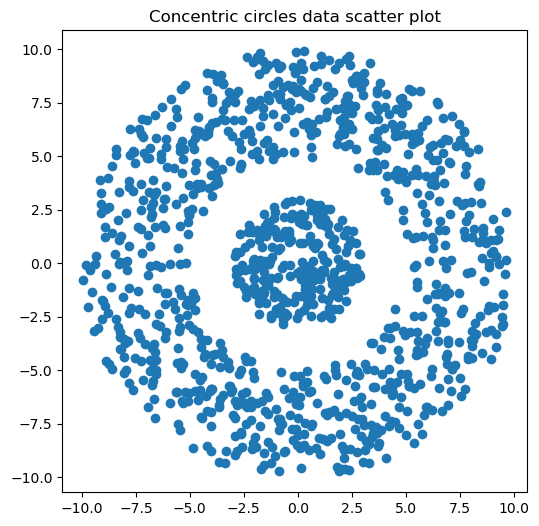

In [6]:
plt.figure(figsize = (6, 6))
plt.scatter(X, Y) 
plt.title("Concentric circles data scatter plot");

The scatter plot appears to be a concentric circles with **two** distinct clusters of points, the separated inner and outer circles. 

## b.
Cluster the data using K-Means for the specified number of clusters as indicated in your response to the previous question. Use a random initialization of means. Create and report a scatterplot of the data with the clusters indicated by their color. How well does this method identify the clusters in the plot? (Hint: It may be helpful to use Python's sklearn package for K-Means tasks.)

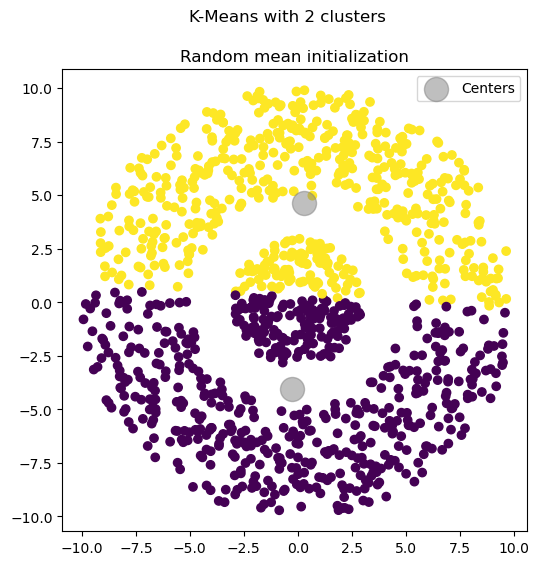

In [9]:
plt.figure(figsize = (6, 6))
kmeans_random = KMeans(init = "random", n_clusters = 2).fit(circles_data)
plt.scatter(X, Y, c = kmeans_random.labels_)
centers_random = kmeans_random.cluster_centers_
plt.scatter(centers_random[:, 0], centers_random[:, 1], 
            c = "grey", s = 300, alpha = 0.5,
            label = "Centers")
plt.legend()
plt.suptitle("K-Means with 2 clusters") 
plt.title("Random mean initialization");

Although this method of using 2 clusters with random mean initialization identified two clusters in the data, it is not accurate in identifying the correct clusters of circles that we see in the original data. It horizontal splits the data almost directly in half.

## c. 
Consider the task of clustering with K-Means using $K=2$ means and initialized means located at $(-8,0)$ and $(1,-1)$. Create and report a scatterplot of the data with the clusters identified under this clustering method indicated by their color. How well does this method identify the clusters in the plot? Does choosing this initialization help in identifying the true clusters?

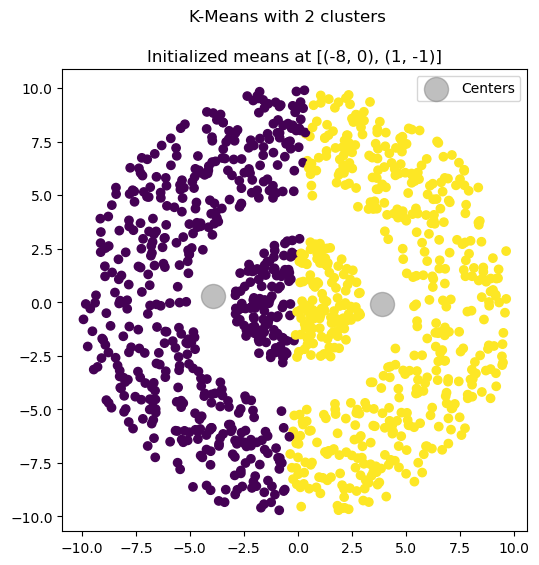

In [12]:
plt.figure(figsize = (6, 6))
init_means_2 = [(-8, 0), (1, -1)]
kmeans_2 = KMeans(init = init_means_2, n_clusters = 2).fit(circles_data)
plt.scatter(X, Y, c = kmeans_2.labels_)
centers_2 = kmeans_2.cluster_centers_
plt.scatter(centers_2[:, 0], centers_2[:, 1], 
            c = "grey", s = 300, alpha = 0.5,
            label = "Centers")
plt.legend()
plt.suptitle("K-Means with 2 clusters") 
plt.title(f"Initialized means at {init_means_2}");

For this method we identified two points at which the mean is initialized, however with concentric circles these points are inaccurate representations of the actual cluster centers. As a result, the K-means fit also split the points into halves, this time vertically. We can see that choosing these initializations did not help in identifying the true clusters.

## d.
Consider the task of clustering with K-Means using $K=5$ means and initialized means located at $(-7.5, 0), (0, 7.5), (7.5, 0), (0, -7.5), (0,0)$. Create and report a scatterplot of the data with the clusters identified under this clustering method indicated by their color. How well does this method identify the clusters in the plot? Does choosing this initialization help in identifying the true clusters?

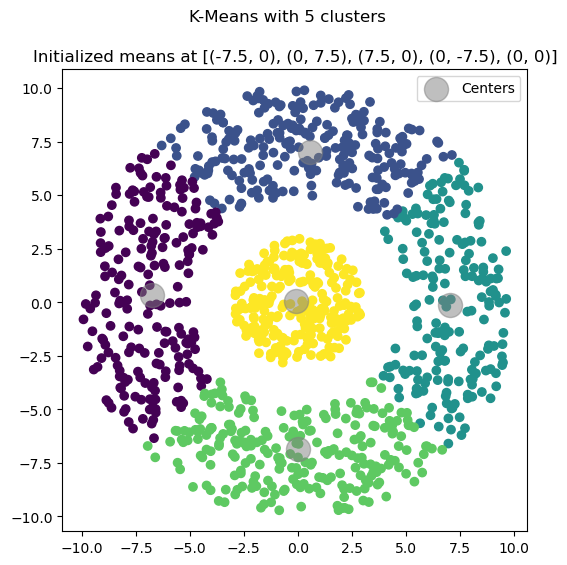

In [15]:
plt.figure(figsize = (6, 6))
init_means_5 = [(-7.5, 0), (0, 7.5), (7.5, 0), (0, -7.5), (0,0)]
kmeans_5 = KMeans(init = init_means_5, n_clusters = 5).fit(circles_data)
plt.scatter(X, Y, c = kmeans_5.labels_)
centers_5 = kmeans_5.cluster_centers_
plt.scatter(centers_5[:, 0], centers_5[:, 1], 
            c = "grey", s = 300, alpha = 0.5,
            label = "Centers")
plt.legend()
plt.suptitle("K-Means with 5 clusters") 
plt.title(f"Initialized means at {init_means_5}");

This method of choosing initializations identifies the one of the circles more accurately than the last two methods. It correctly identified the small inner circle as its own cluster due to an initialized mean at (0, 0). However, setting K=5 splits the outer circle into four different clusters, which is not an accurate depiction of the true clusters since the outer circle should just be one cluster.

### Function for parts e-f

In [18]:
def spectral_clustering(K, s):
    # Pairwise distances
    D = metrics.pairwise_distances(circles_data, circles_data)
    
    # Create kernel
    kernel = np.exp(-D**2/(2*s**2))
    
    # Remove diagonal of kernal
    kernel = kernel - np.diag(np.diag(kernel))
    
    # D^(-0.5)
    D1 = np.diag(np.sum(kernel, axis=0)**(-0.5))
    K1 = D1.dot(kernel).dot(D1)
    
    # Top K eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(K1)
    top_eigenvectors = np.real(
        eigenvectors[:, (np.argsort(np.abs(eigenvalues))[::-1])[:K]]
    )

    # Normalize rows
    top_eigenvectors = np.transpose(
        np.transpose(top_eigenvectors)/np.linalg.norm(top_eigenvectors, axis = 1)
    )
    top_eigenvectors = np.nan_to_num(top_eigenvectors)
    
    # K-means with K clusters
    kmeans_spectral_clust = KMeans(n_clusters = K).fit(top_eigenvectors)
    plt.figure(figsize = (6, 6))
    plt.scatter(X, Y, 
                c = kmeans_spectral_clust.labels_)
    centers_spectral_clust = kmeans_spectral_clust.cluster_centers_
    plt.scatter(centers_spectral_clust[:, 0], centers_spectral_clust[:, 1], 
                c = "grey", s = 300, alpha = 0.5,
            label = "Centers")
    plt.legend()
    plt.title(f"Spectral clustering with K={K} and sigma={s}");

## e.
Now consider the task of grouping the points using spectral clustering. Using the value of $K$ as indicated by your response to part a., create and report a scatterplot of the data with the clusters identified under this clustering method indicated by their color. Use a Gaussian Kernel with a bandwidth parameters ($\sigma$) value of $1.5$. Use the numpy.linalg.eig function to identify eigenvectors and use the top K eigenvectors in terms of decreasing magnitude of eigenvalues. How well does this method identify the clusters in the plot? How do the types of clusters found in this method differ from those found using K-Means?

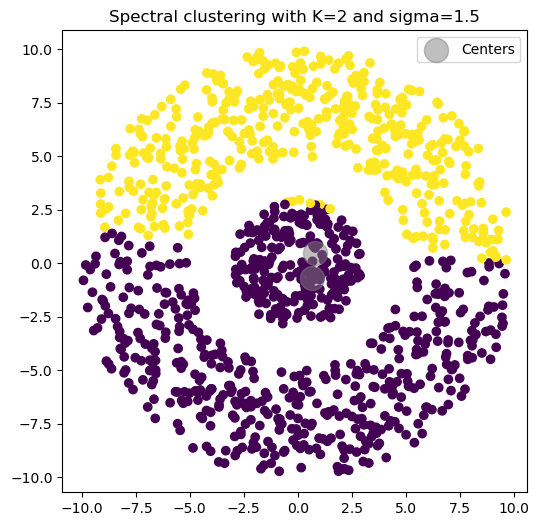

In [20]:
spectral_clustering(K = 2, s = 1.5)

This method of identifying clusters using K=2 is just slightly more accurate than using K-means. With just two clusters, the spectral clustering algorithm was able to keep most of the smaller circle in one cluster, whereas in K-means methods split the both circles in half. However, the result still does not represent the true division of clusters in the original data.

## f.
Using $K=2$ means and spectral clustering, create clusters using different values of the bandwidth parameter $\sigma$ Consider the clusters created by $\sigma = \{0.1, 1, 2\}$. For which of these values of $\sigma$ do the most appropriate clusters get created? Create and report a scatterplot of the clusters under this method indicated by their color. How well does this method identify the clusters in the plot?

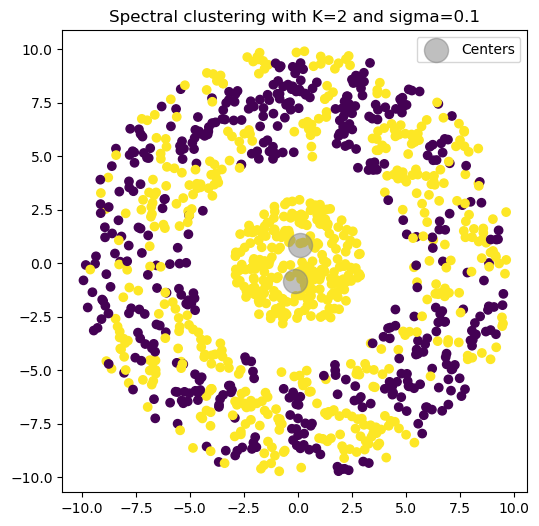

In [23]:
spectral_clustering(K = 2, s = 0.1)

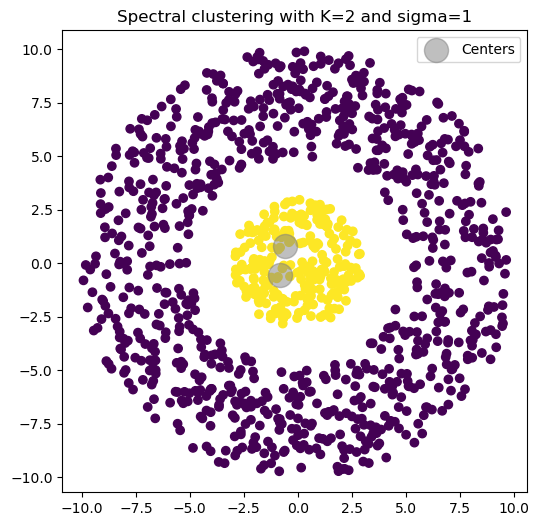

In [24]:
spectral_clustering(K = 2, s = 1)

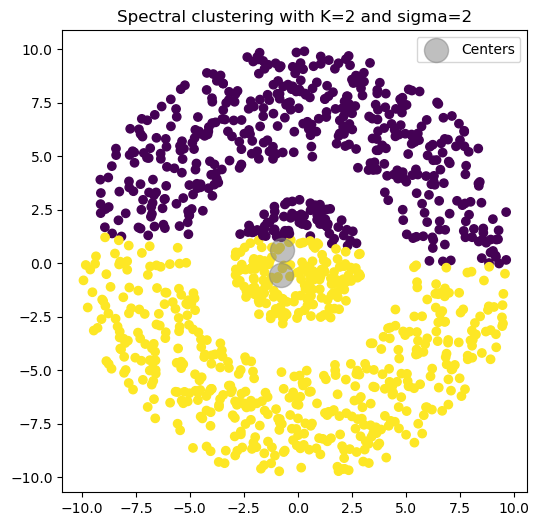

In [25]:
spectral_clustering(K = 2, s = 2)

Out of $\sigma = \{0.1, 1, 2\}$, the most accurate result that identified the true clusters in the data is spectral clustering with $\sigma = 1$. As we can see from the second plot above (recreated below as well), the inner and outer circle are different colors, correctly indicating the distinct clusters. As for $\sigma = 0.1$, only the inner circle is accurately identified, and $\sigma=2$ has similar results to our output using K-means with two clusters, thus these other bandwidth parameters do not identify the correct clusters well.

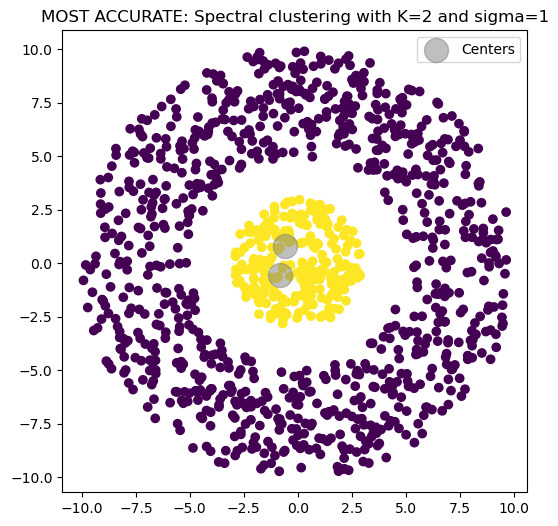

In [27]:
spectral_clustering(K = 2, s = 1)
plt.title("MOST ACCURATE: Spectral clustering with K=2 and sigma=1");